### Importing The Necessary Libraries

In [218]:
import pandas as pd 
# Pandas is aliased as pd
import matplotlib.pyplot as plt
# Pyplot is aliased as plt
import numpy as np
# Numpy is aliased as np
import seaborn as sns
# Seaborn is aliased sns

###  Q.1 Download the Oil Spill Dataset and perform Data cleaning and Data Pre-Processing if Necessary.


#### Loading The Dataset/CSV File

In [219]:
dataset = pd.read_csv('/content/oil_spill.csv')
dataset.head() # Returns Top 5 Rows

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


 <p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #0115ACD">Data Preprocessing </p>

In [220]:
dataset.shape
# Rows = 937, Col=50

(937, 50)

### Checking Null Values

In [221]:
nv = dataset.isnull().sum()
null_values = nv[nv>0]
null_values

Series([], dtype: int64)

### Checking Duplicated Values

In [222]:
dataset.duplicated().sum()

0

### Checking Datatypes Of The Features

In [223]:
dataset.dtypes

f_1         int64
f_2         int64
f_3       float64
f_4       float64
f_5         int64
f_6         int64
f_7       float64
f_8       float64
f_9       float64
f_10      float64
f_11      float64
f_12      float64
f_13      float64
f_14      float64
f_15      float64
f_16      float64
f_17      float64
f_18      float64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23        int64
f_24      float64
f_25      float64
f_26      float64
f_27      float64
f_28      float64
f_29      float64
f_30      float64
f_31      float64
f_32      float64
f_33      float64
f_34      float64
f_35        int64
f_36        int64
f_37      float64
f_38      float64
f_39        int64
f_40        int64
f_41      float64
f_42      float64
f_43      float64
f_44      float64
f_45      float64
f_46        int64
f_47      float64
f_48      float64
f_49      float64
target      int64
dtype: object

In [224]:
dataset.dtypes.value_counts()
# no.of float features = 39 and integer = 11

float64    39
int64      11
dtype: int64

In [225]:
t = dataset['target'].value_counts()
t
# 0 = Non-Spill and 1 = Oil-Spill

0    896
1     41
Name: target, dtype: int64

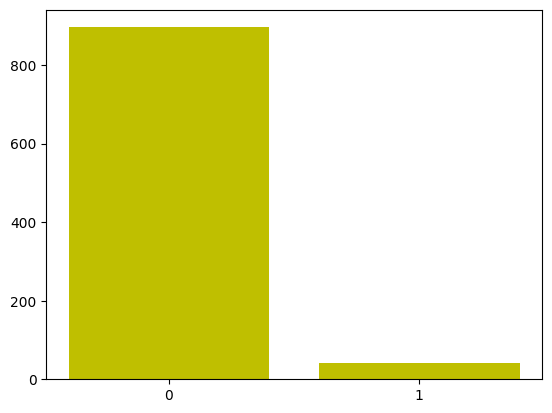

In [226]:
plt.bar(t.index,t,color='y')
plt.xticks(t.index)
plt.show()

##  Inferences
<b> Non-Oil Spill:<b><br>
   -> Negative Case, or Majority class
    
<b> Oil-Spill:<b><br>
   ->  Positive Case,or Minority class                 


### Information  About The Features/Columns

In [227]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

### <b> Fetch and Drop the columns that has excatly a single values <b>

In [228]:
for i in dataset.columns:    # i refers to the column in train_df
    if dataset[i].nunique() == 1:
        print(i)
        dataset.drop(i, inplace = True, axis = 1)

f_23


### Droping The Columns Which Are Not Correlated

In [229]:
df = dataset.drop(columns=['f_1','f_33','f_37','f_46'],axis=1) # df is a cleaned DataFrame
print(type(df)) # df is a new cleaned DataFrame
df.head(30)


<class 'pandas.core.frame.DataFrame'>


,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,...,f_40,f_41,f_42,f_43,f_44,f_45,f_47,f_48,f_49,target
0,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,214.7,...,69,2850.00,1000.00,763.16,135.46,3.73,33243.19,65.74,7.95,1
1,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,901.7,...,69,5750.00,11500.00,9593.48,1648.80,0.60,51572.04,65.73,6.26,0
2,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,86.1,...,69,1400.00,250.00,150.00,45.13,9.33,31692.84,65.81,7.84,1
3,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,166.5,...,69,6041.52,761.58,453.21,144.97,13.33,37696.21,65.67,8.07,1
4,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,232.8,...,69,1320.04,710.63,512.54,109.16,2.58,29038.17,65.66,7.35,0
5,54,1438.13,544.91,82,135000,44.67,6.92,1570.0,0.15,86.0,...,69,608.28,200.00,150.00,52.22,4.06,30967.25,65.77,7.85,1
6,116,1446.29,580.94,97,290000,41.53,6.24,3660.0,0.15,79.2,...,69,1060.66,403.11,164.58,114.82,6.44,31258.37,65.79,7.85,1
7,57,28.68,715.39,141,142500,51.67,0.83,1810.0,0.02,78.7,...,69,500.00,360.56,165.71,132.47,3.02,51985.06,65.67,6.25,0
8,188,964.23,456.23,22,470000,38.90,5.89,3720.0,0.15,126.3,...,69,1569.24,492.44,256.77,124.72,6.11,28871.82,65.67,7.36,1
9,64,903.02,274.88,33,160000,41.22,7.90,1850.0,0.19,86.5,...,69,471.70,223.61,182.83,50.12,2.58,32053.95,65.58,7.35,1


### Extracting Categorical Columns

In [230]:
cat_cols = df.dtypes[df.dtypes=='object']
print(cat_cols)

Series([], dtype: object)


In [231]:
df.shape
# Rows = 937 , Columns = 45

(937, 45)

In [232]:
df.columns

Index(['f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11',
       'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20',
       'f_21', 'f_22', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30',
       'f_31', 'f_32', 'f_34', 'f_35', 'f_36', 'f_38', 'f_39', 'f_40', 'f_41',
       'f_42', 'f_43', 'f_44', 'f_45', 'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')

In [233]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv
# There are no Null Values  after droping the columns

Series([], dtype: int64)

In [234]:
dataset.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


### Q.2 Use the various methods such as Handling null values, One-Hot Encoding, Imputation and Scaling of     <br> Data Pre-Processing where necessary.


#### Selecting Independent(x) and Dependent(y) Features

In [235]:
X  = df.drop('target',axis=1) # Here carefull don't use inplace = True it effect actual df
y = df['target']
print(type(X))  # Dataframe = Multi_Dimensional
print(type(y))  # Series = One Dimensional
print(X.shape)  
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(937, 44)
(937,)


In [236]:
from sklearn.preprocessing import StandardScaler

#### Standardization /  Scaling of Independent Features

In [237]:
sc = StandardScaler()

In [238]:
X = sc.fit_transform(X)

In [239]:
print(type(X)) # Returns numpy Array
X.shape

<class 'numpy.ndarray'>


(937, 44)

In [240]:
X

array([[ 1.15238979,  1.34643407, -0.79300695, ...,  3.68676672,
         0.38873035, -0.05837721],
       [11.38954577, -1.03327258, -0.05734172, ...,  6.36218073,
         0.38776948, -0.6396642 ],
       [-0.11281849,  1.2526453 , -0.50249191, ...,  3.46046621,
         0.39545643, -0.09621246],
       ...,
       [-0.1651255 , -1.12327578, -0.84615321, ..., -0.8513792 ,
         0.40506512, -0.68781815],
       [-0.16719707, -1.00510593, -0.80320751, ..., -0.81220448,
         0.41083033, -0.61902679],
       [-0.16667918, -1.15230961, -1.21576566, ..., -0.6135064 ,
         0.38008253, -0.6396642 ]])

###  Q.3 Derive some insights from the dataset

####  EDA - Exploratory Data Analysis

###  Generating Boxplots for independent features

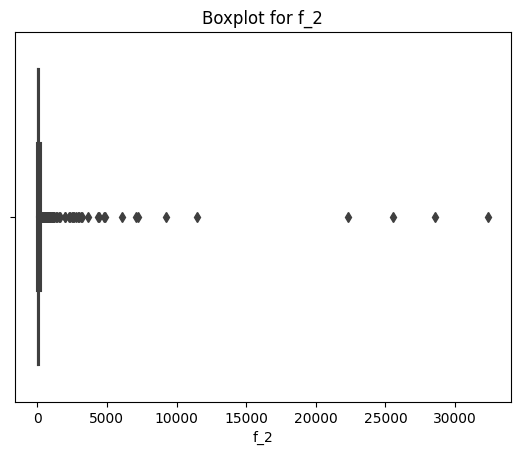

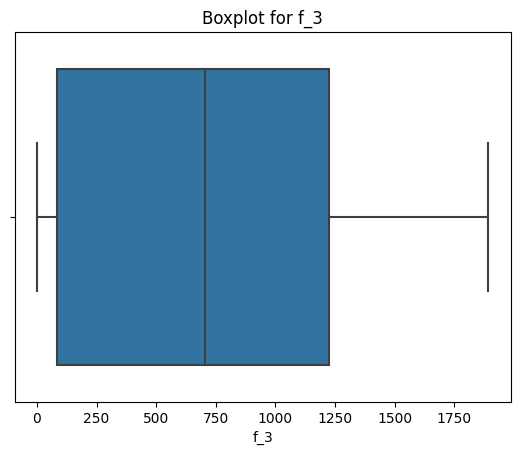

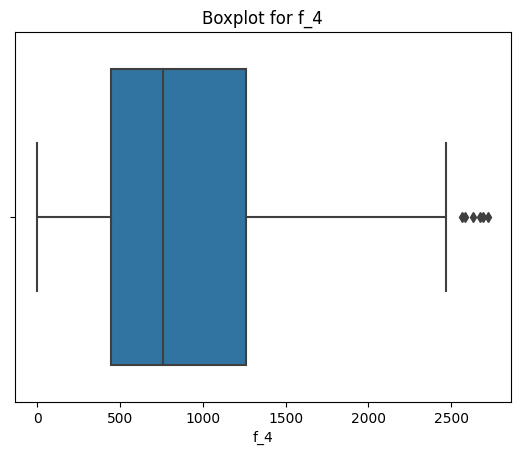

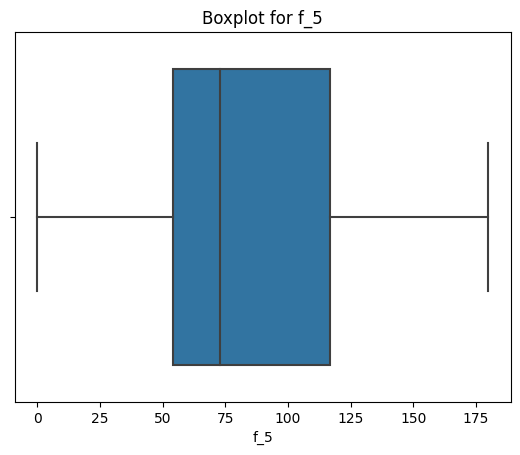

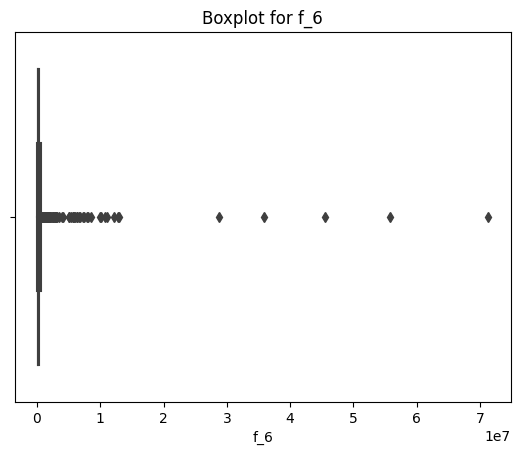

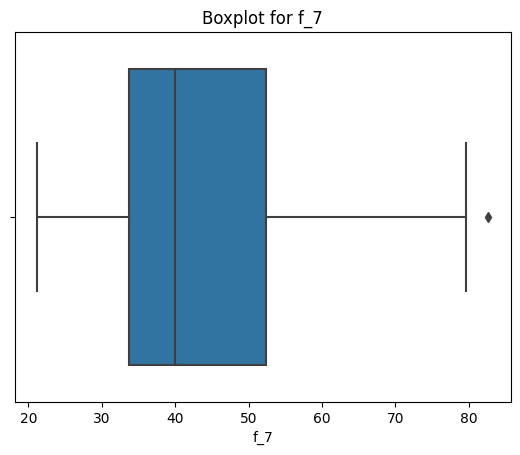

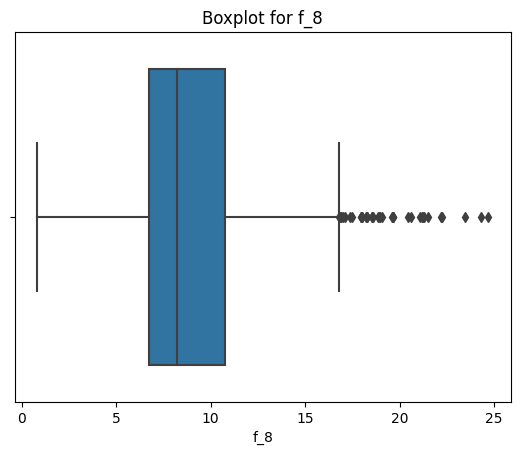

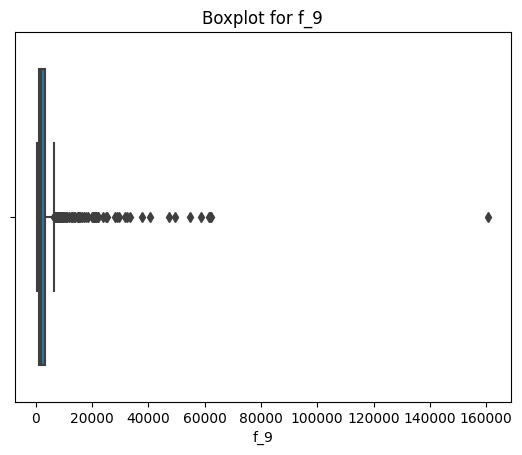

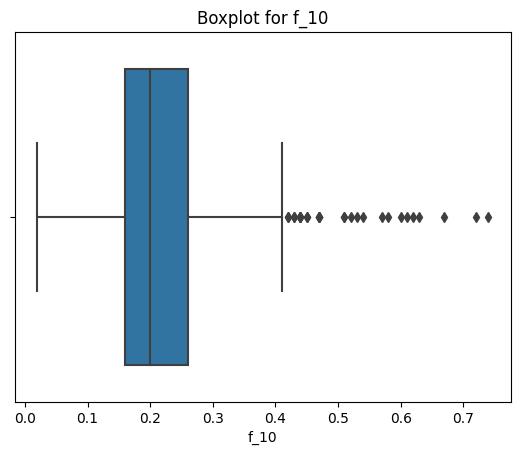

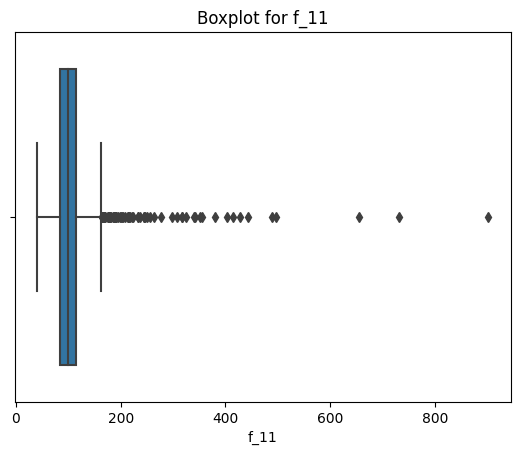

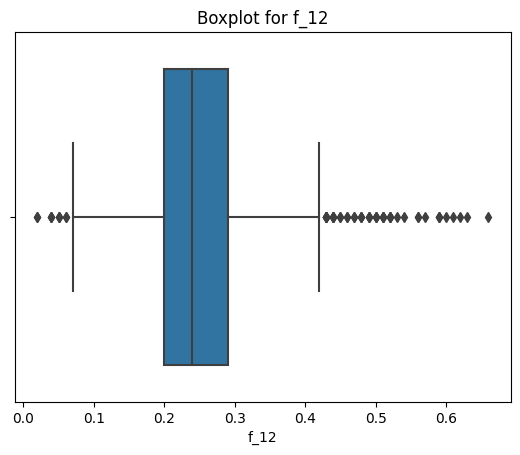

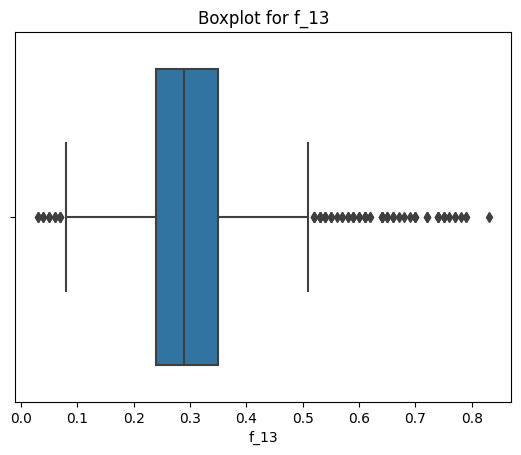

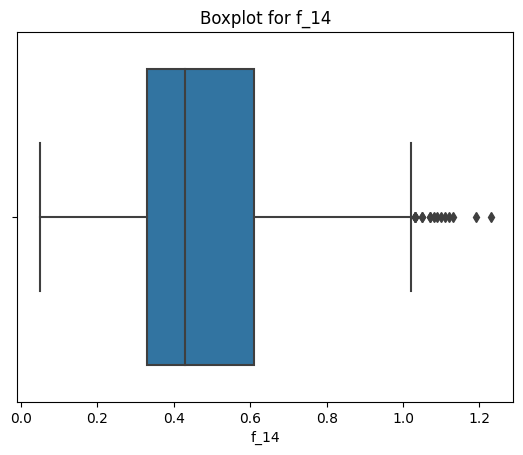

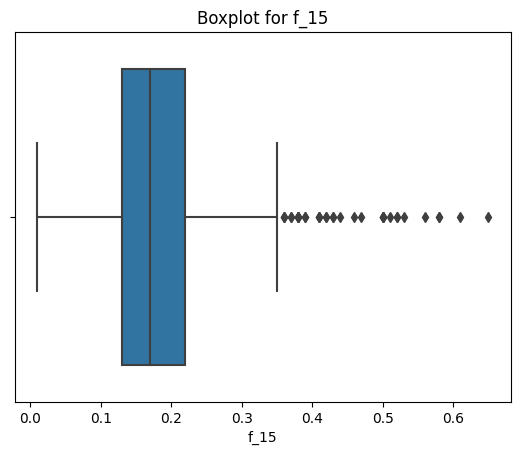

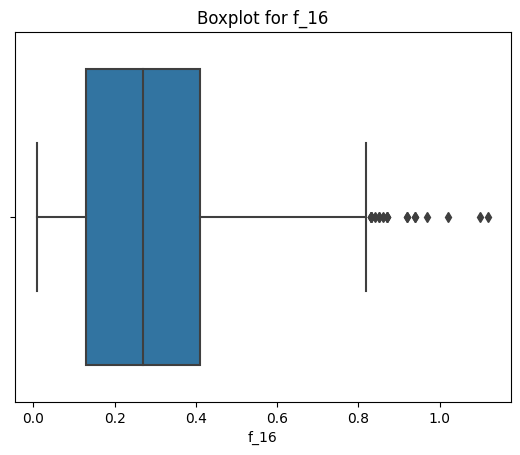

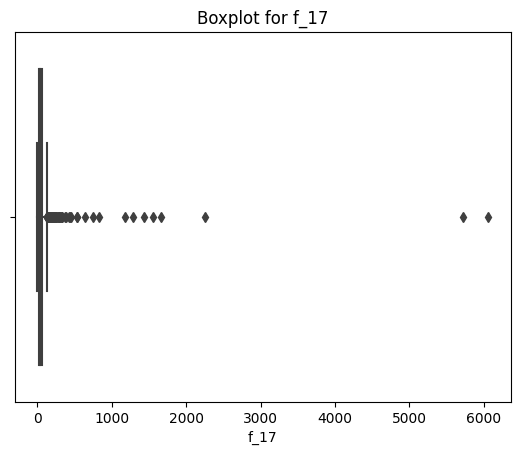

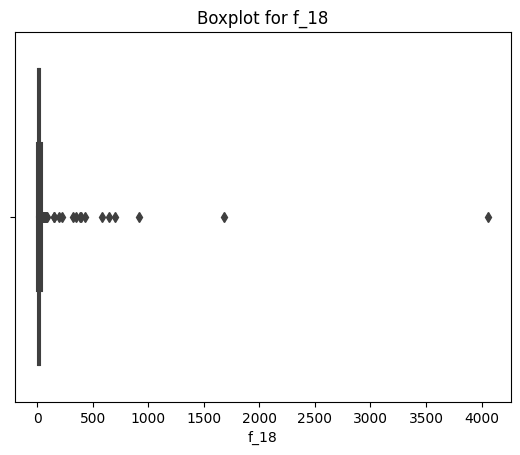

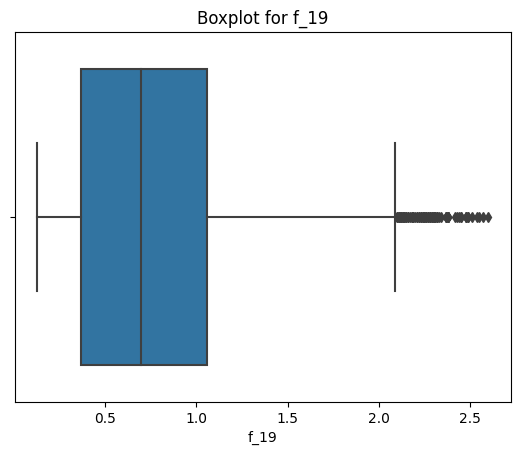

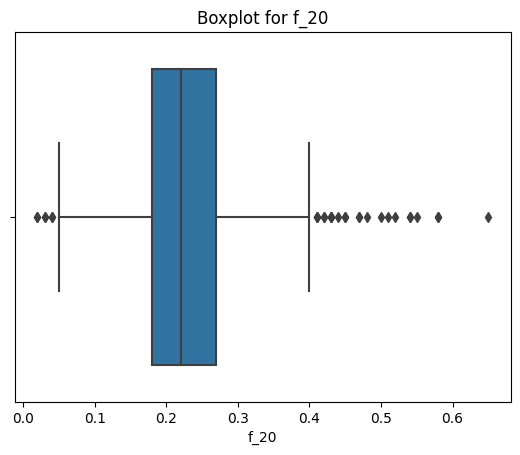

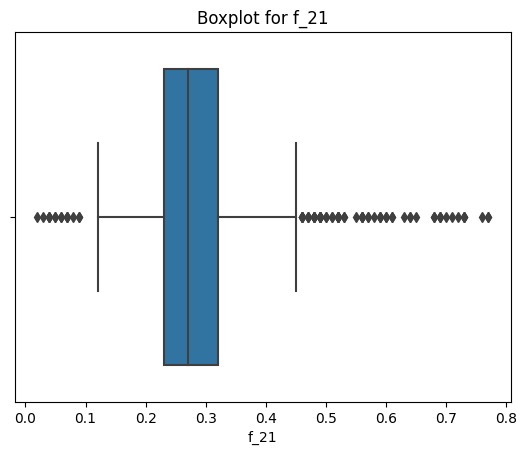

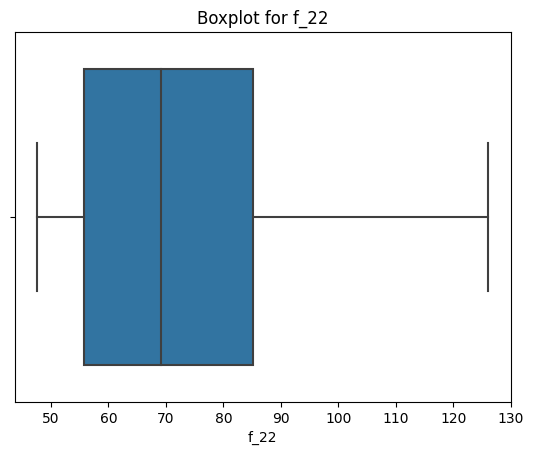

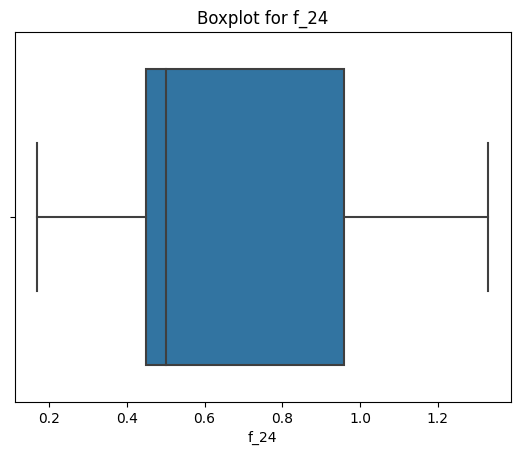

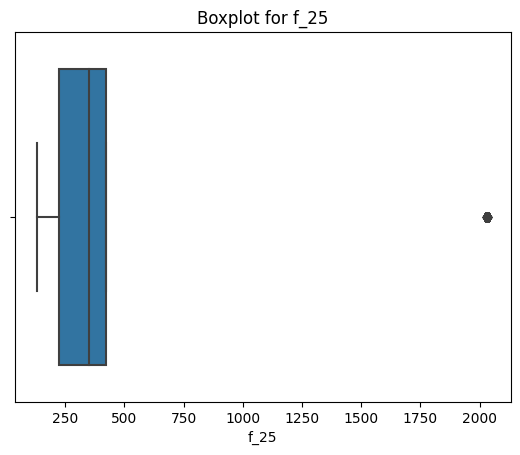

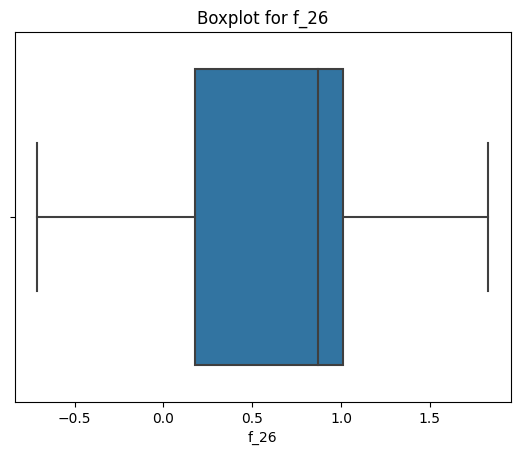

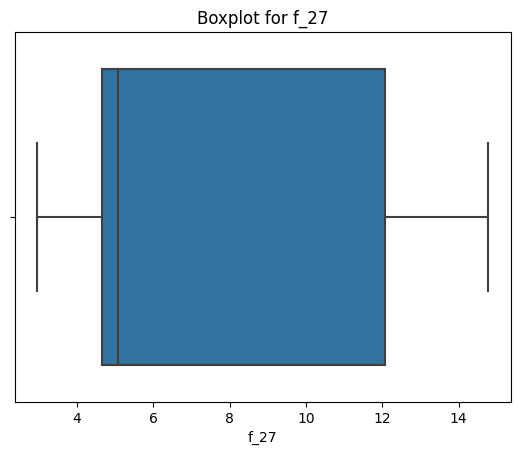

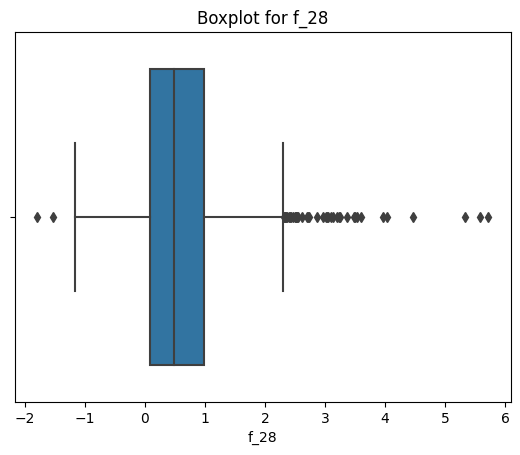

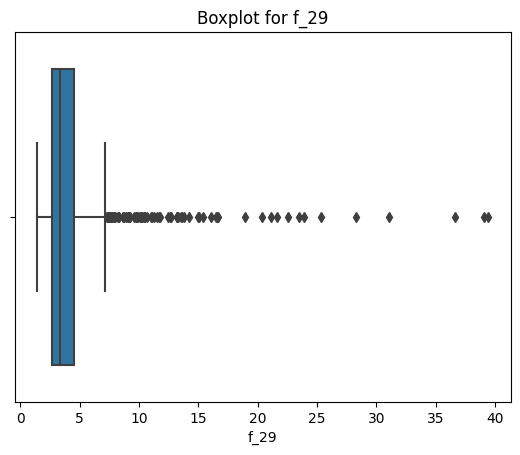

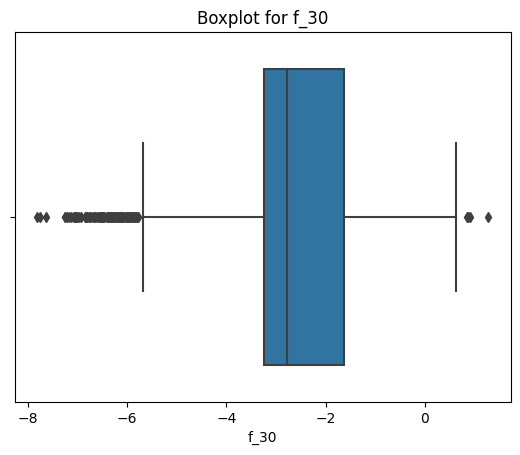

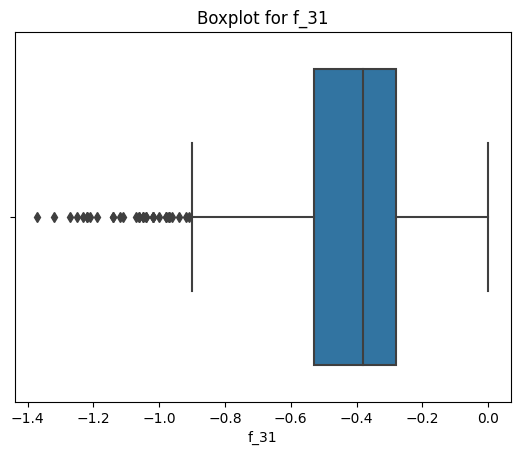

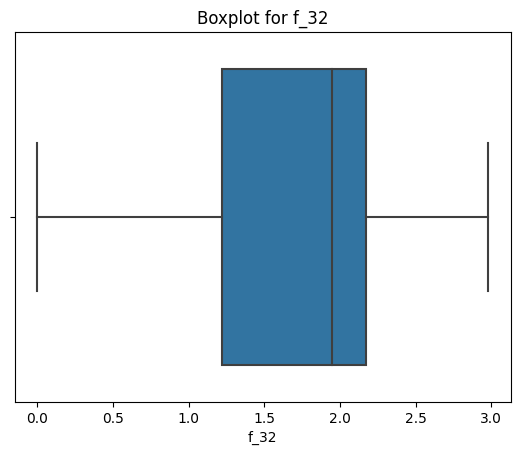

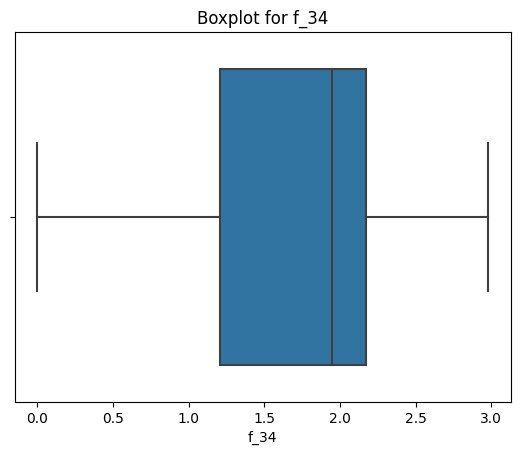

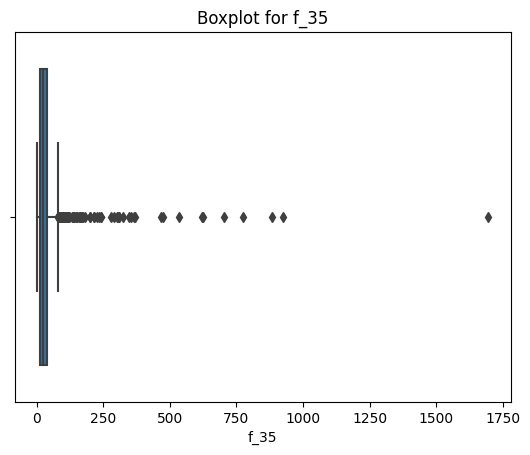

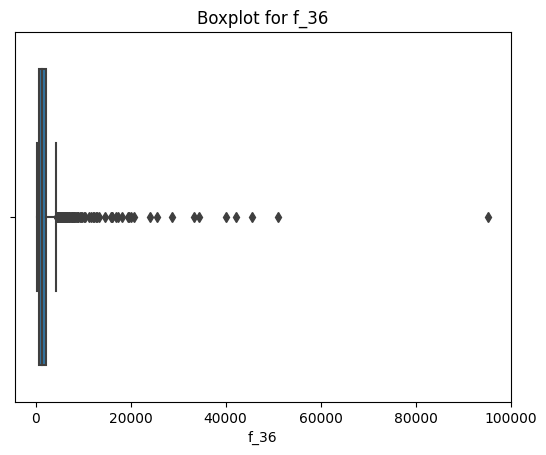

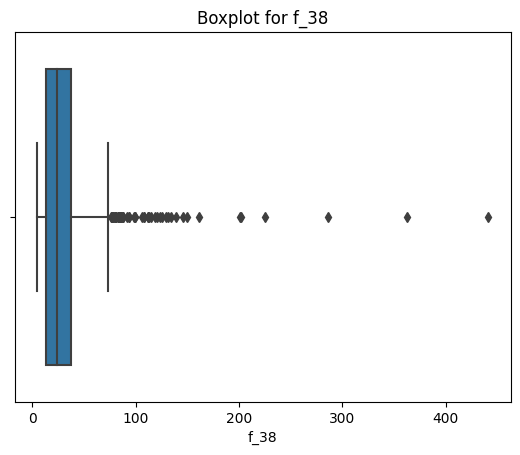

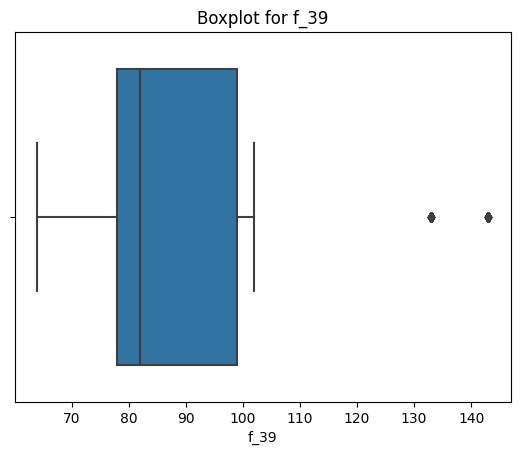

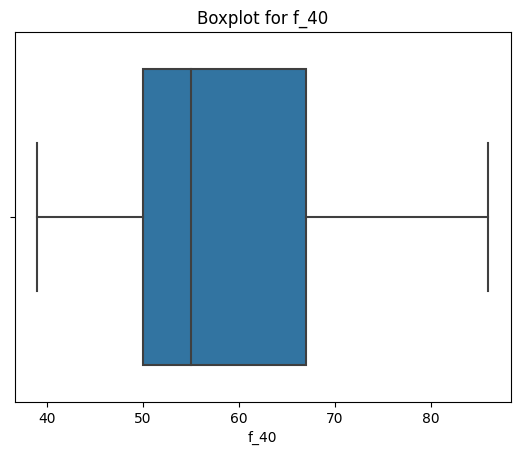

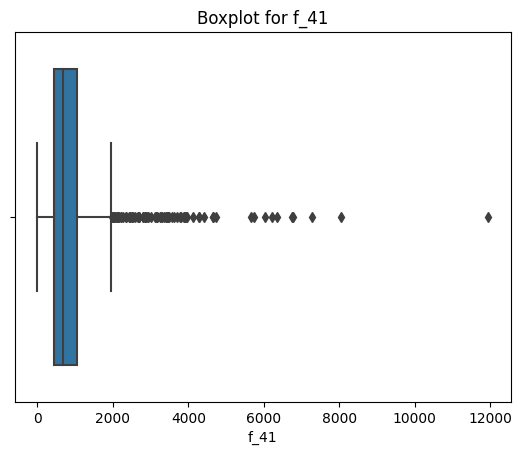

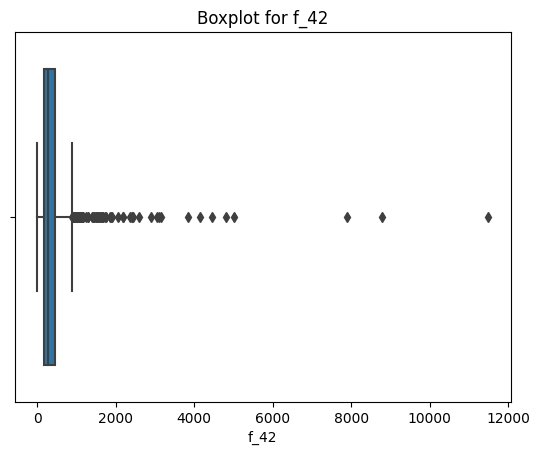

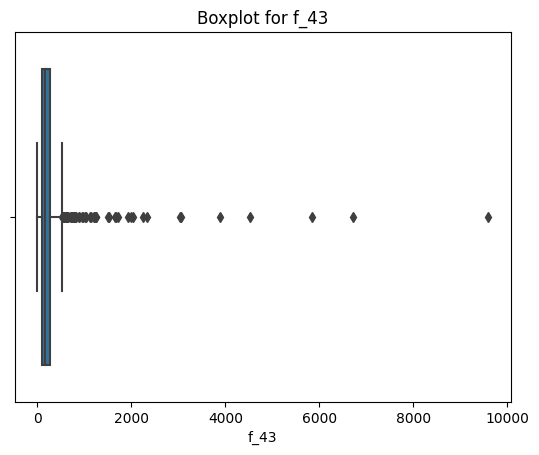

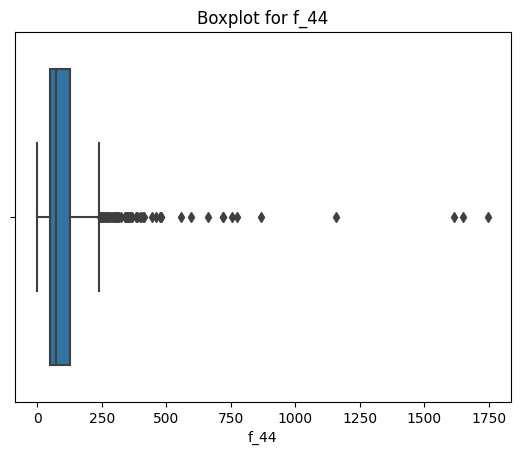

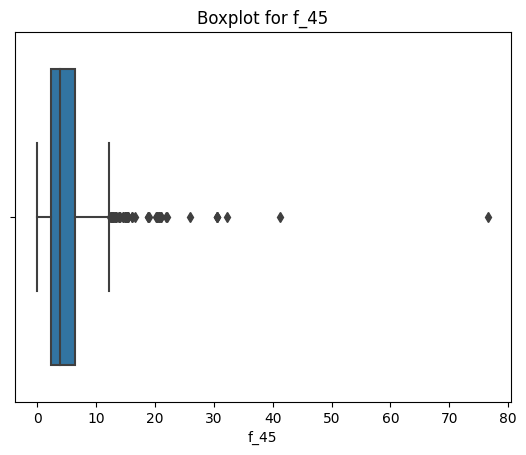

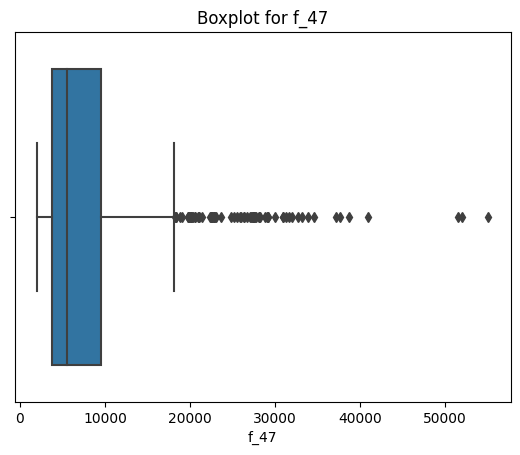

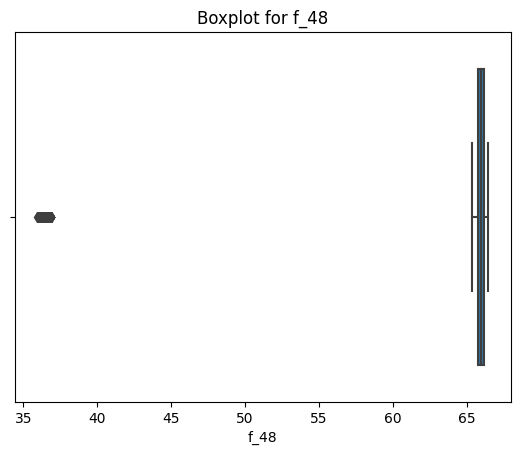

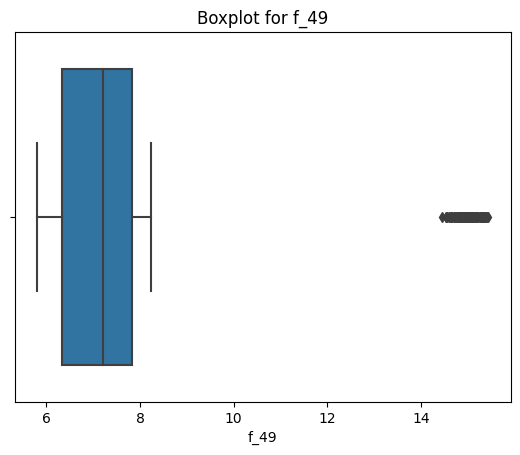

In [241]:
for i in df.columns[:-1]:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

### Correlation

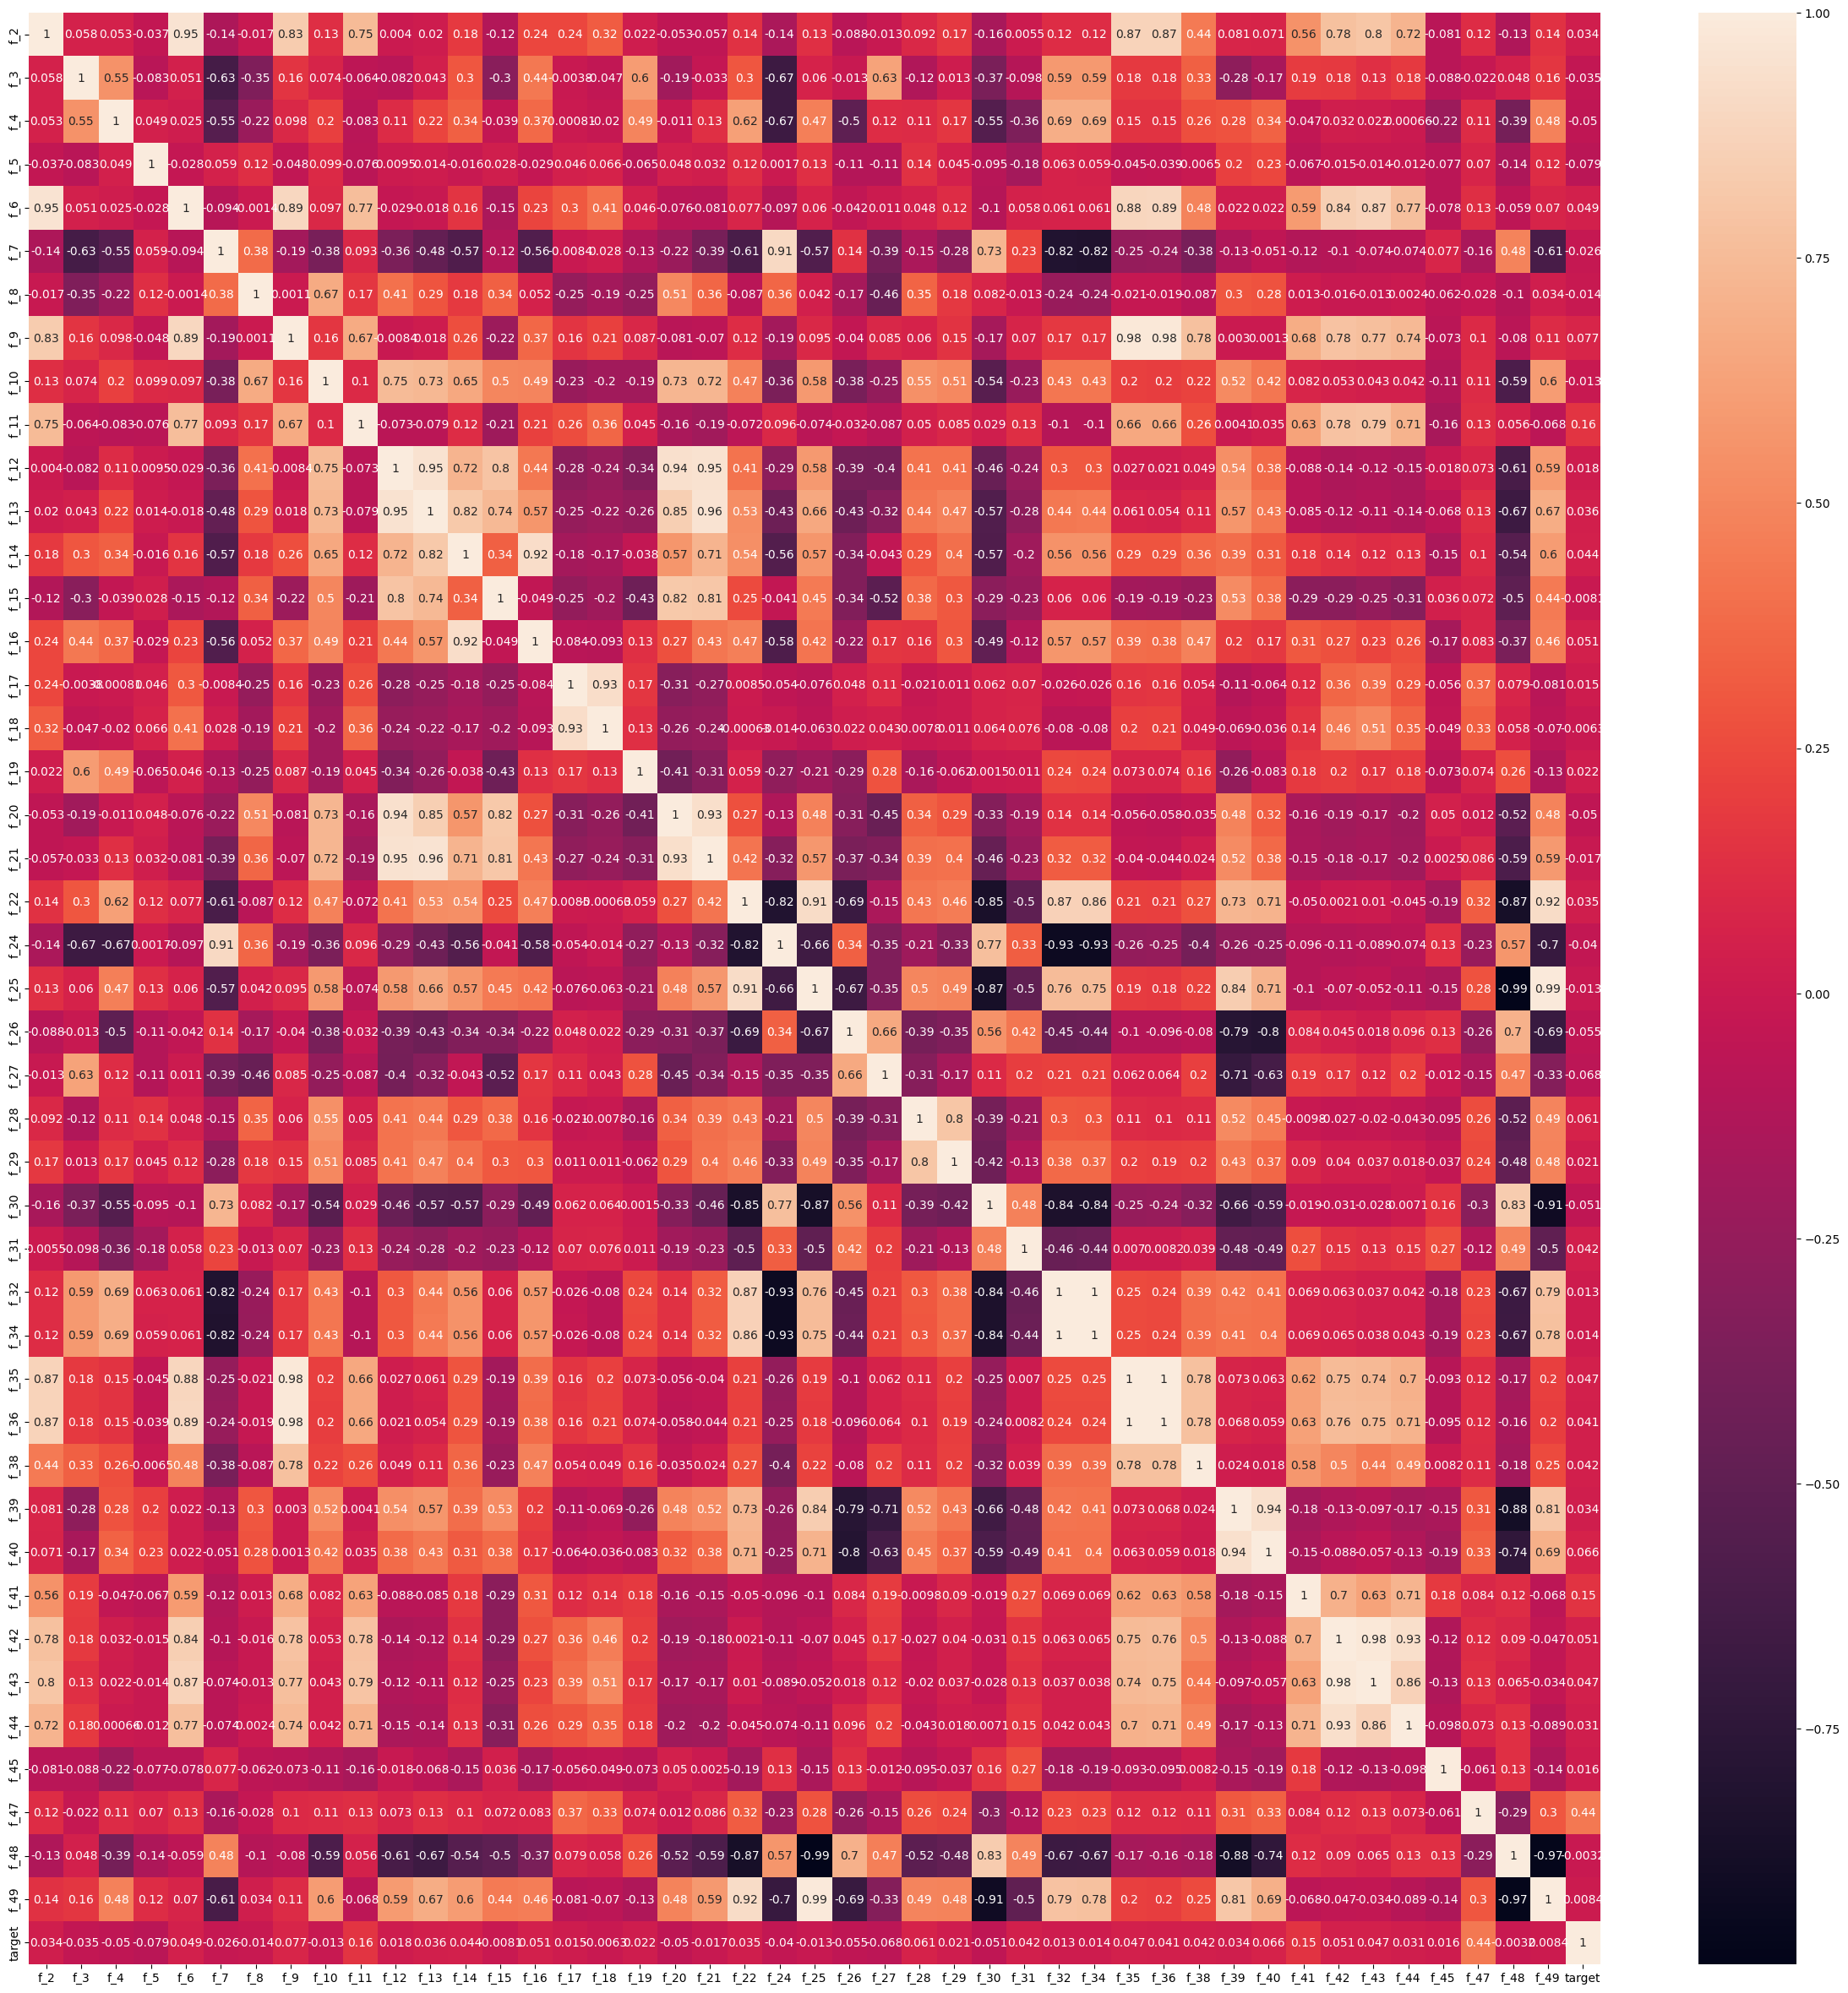

In [242]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True)
plt.show()

#### Depicting Distribution f_6 and f_47 based on target

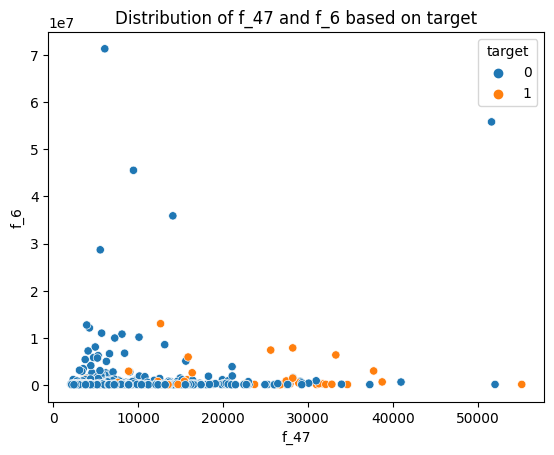

In [243]:
sns.scatterplot(x=df['f_47'],y=df['f_6'],hue=df['target'])
plt.title('Distribution of f_47 and f_6 based on target')
plt.show()

 <b>Q.4  Apply various Machine Learning techniques to predict the output in target column, make use of Bagging  and Ensemble as required and find the best model by evaluating the model using Model evaluation techniques.<b>

In [244]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#### Creating Model Evaluation and model score functions to compute Confusion_Matrix, Classification Report 

#### To Know The Model Score

In [245]:
d = {'Model':[],'TP':[],'FN':[],'FP':[],'TN':[],'Acc':[]}
def eval_model(model,model_name,x_test,ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    acc = accuracy_score(ytest,ypred)
    print('Accuracy Score',acc)
    cls_rep = classification_report(ytest,ypred)
    print('Classification Report\n',cls_rep)
    d['Model'].append(model_name)
    d['TP'].append(cm[0,0])
    d['FN'].append(cm[0,1])
    d['FP'].append(cm[1,0])
    d['TN'].append(cm[1,1])
    d['Acc'].append(acc)
    
    
def mscore(model,x_train,y_train):
    print('Training Score',model.score(x_train,y_train))   # Trainig  Score
    print('Testing Score',model.score(x_test,y_test))     # Testing   SCore

#### Importing the libraries for Model Building

In [246]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

#### Splitting The Data Into Training and Testing

In [247]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print(x_train.shape) # rows = 702, col = 44
print(x_test.shape)  # rows = 235,col = 44
print(y_train.shape) # ROWS = 702
print(y_test.shape)  # ROWS = 235

(702, 44)
(235, 44)
(702,)
(235,)


In [248]:
print(937*0.25) 
# Test size is 25% so it takes round(235) Rows 

234.25


In [249]:
x_train,x_test

(array([[ 6.32645317e-02, -3.72181808e-01, -1.28475820e+00, ...,
          1.73753308e+00,  3.64708635e-01, -4.16092281e-01],
        [-1.39748831e-01,  7.35422899e-01,  1.21215949e-01, ...,
         -4.48207111e-01,  4.06025989e-01, -2.50993019e-01],
        [-1.56321351e-01, -5.18101395e-01, -1.00157302e+00, ...,
          9.55651573e-01,  4.07947726e-01, -2.68190859e-01],
        ...,
        [-1.65643393e-01, -1.12247531e+00, -4.28083310e-01, ...,
         -3.42372010e-01,  4.32930312e-01, -7.66928213e-01],
        [-7.03514061e-02, -7.87277171e-01,  1.31669109e+00, ...,
         -2.04033250e-03, -2.45255838e+00,  2.31836425e+00],
        [-1.55285568e-01, -1.12821203e+00, -4.76234552e-01, ...,
         -6.04272502e-01,  4.29086838e-01, -7.60049077e-01]]),
 array([[-0.10505012,  0.56727351,  0.19020849, ..., -0.74929984,
          0.40602599, -0.29226783],
        [ 1.36627887,  0.53732247, -0.45968017, ...,  2.56809471,
          0.39257383, -0.24411388],
        [-0.16305394, -1.

In [250]:
y_train,y_test

(240    0
 270    0
 747    0
 838    0
 39     0
       ..
 835    0
 192    0
 629    0
 559    0
 684    0
 Name: target, Length: 702, dtype: int64,
 406    0
 14     1
 689    0
 145    0
 310    0
       ..
 45     0
 436    0
 172    0
 493    0
 298    0
 Name: target, Length: 235, dtype: int64)

In [251]:
dt1 = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=20)

### Building The BaggingClassifier Model

In [252]:
x_train.shape # x_train.shape[0]=702 and x_train.shape[1]=44

(702, 44)

In [253]:
bc_dt = BaggingClassifier(base_estimator=dt1,n_estimators=15,
                          max_samples=x_train.shape[0],max_features=x_train.shape[1],
                          random_state=2022)

### Training The Data

In [254]:
bc_dt.fit(x_train,y_train)  
#Train The Model

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_split=20),
                  max_features=44, max_samples=702, n_estimators=15,
                  random_state=2022)

#### Training and the Testing Score

In [255]:
mscore(bc_dt,x_train,y_train)

Training Score 0.9757834757834758
Testing Score 0.9744680851063829


#### Generate the Predictions for the test dataset

In [256]:
y_pred = bc_dt.predict(x_test)
print(y_pred.shape)
print(type(y_pred))  # Numpy array

(235,)
<class 'numpy.ndarray'>


In [257]:
y_pred 
# Predicted  Output Of The Target Feature

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [258]:
y_test.values  # Actual Result

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Applying Model Evaluation Techniques

In [259]:
eval_model(bc_dt,'BaggClass',x_test,y_test,y_pred)

Confusion Matrix
 [[224   0]
 [  6   5]]
Accuracy Score 0.9744680851063829
Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       224
           1       1.00      0.45      0.62        11

    accuracy                           0.97       235
   macro avg       0.99      0.73      0.81       235
weighted avg       0.98      0.97      0.97       235



####  Applying Logistic Regression

In [260]:
# importing LogisticRegression library
from sklearn.linear_model import LogisticRegression

In [261]:
# Building LogisticRegression   model
log_reg = LogisticRegression(max_iter=100000,solver='liblinear') # Object Created
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=100000, solver='liblinear')

In [262]:
# Computing Training and testing score
mscore(log_reg,x_train,y_train)

Training Score 0.9772079772079773
Testing Score 0.9702127659574468


In [263]:
# Generating prediction
ypred_logreg = log_reg.predict(x_test)
print(ypred_logreg) # Predict Target Resullt

[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [264]:
print(y_test.values) # Target Column Result

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [265]:
# Evaluate the model - confusion matrix, clasification Report, Accuaracy
eval_model(log_reg,'LogReg',x_test,y_test,ypred_logreg)

Confusion Matrix
 [[221   3]
 [  4   7]]
Accuracy Score 0.9702127659574468
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       224
           1       0.70      0.64      0.67        11

    accuracy                           0.97       235
   macro avg       0.84      0.81      0.83       235
weighted avg       0.97      0.97      0.97       235



### Ensemble Modeling

In [266]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [267]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=20)

In [268]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)
print(x_train.shape) # rows = 702, col = 44
print(x_test.shape)  # rows = 235,col = 44
print(y_train.shape) # ROWS = 702
print(y_test.shape)  # ROWS = 235

(655, 44)
(282, 44)
(655,)
(282,)


####  AdaBoostClassifier Model

In [269]:
ada_boost = AdaBoostClassifier(base_estimator=dt2,n_estimators=15)
ada_boost.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_split=20),
                   n_estimators=15)

#### Training And Testing Score

In [270]:
mscore(ada_boost,x_train,y_train)

Training Score 1.0
Testing Score 0.9609929078014184


#### Prediction Of the Model

In [271]:
y_pred2 = ada_boost.predict(x_test)
print(y_pred2.shape)
print(type(y_pred2))  # Numpy array

(282,)
<class 'numpy.ndarray'>


In [272]:
y_pred2
# Predicted  Output Of The Target Feature

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [273]:
y_test.values  # Actual Result

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Applying Model Evaluation Techniques

In [274]:
eval_model(ada_boost,'AdaBoost',x_test,y_test,y_pred2)

Confusion Matrix
 [[268   2]
 [  9   3]]
Accuracy Score 0.9609929078014184
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       270
           1       0.60      0.25      0.35        12

    accuracy                           0.96       282
   macro avg       0.78      0.62      0.67       282
weighted avg       0.95      0.96      0.95       282



 <b>INFERENCE <b>:-<br> 
    <b>Bagging Classifier Have More Accuracy Score As Compare To AdaBoost. 
        Achieving 100% accuracy on the training data is not always a good thing, as it can be a sign of overfitting. So aim for a model that performs well on both training and testing Data i.e Bagging Classifier we have obtained 97% Accuracy which is a  Best  Model .  <br><br>-> AdaBoost is a Overfit Model <b> 

## Q.5 Save the best model and Load the model


In [275]:
print(d)

{'Model': ['BaggClass', 'LogReg', 'AdaBoost'], 'TP': [224, 221, 268], 'FN': [0, 3, 2], 'FP': [6, 4, 9], 'TN': [5, 7, 3], 'Acc': [0.9744680851063829, 0.9702127659574468, 0.9609929078014184]}


In [276]:
model_performance = pd.DataFrame(d)
model_performance

,Model,TP,FN,FP,TN,Acc
0,BaggClass,224,0,6,5,0.974468
1,LogReg,221,3,4,7,0.970213
2,AdaBoost,268,2,9,3,0.960993


### Saving The Model

In [277]:
import pickle

In [278]:
pickle.dump(bc_dt, open('spill_pred.pkl', 'wb'))   # wb = write binary

### Loading The Model

In [279]:
load_model = pickle.load(open('spill_pred.pkl', 'rb'))  # rb = read binary

<b>Q.6 Take the original dataset and make another dataset by randomly
picking 20 data points from the oil spill dataset and apply the saved
model on the same .<b>


#### Generating  Randomly New DataFrame Of 20 Datapoints

In [280]:
random_df = dataset.sample(20) # Randomly Gives 20 Datapoints
print(type(random_df)) # Another Dataset From Original Dataset 
random_df

<class 'pandas.core.frame.DataFrame'>


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
854,122,14,141.86,446.50,66,113400,51.71,5.44,1064.0,0.10,...,484.66,180.00,126.00,49.30,3.85,0,3830.45,65.98,6.46,0
525,31,176,324.22,1542.32,110,247500,26.34,9.76,3149.5,0.37,...,0.00,0.00,0.00,0.00,0.00,0,8381.63,36.24,14.88,0
227,72,150,1238.74,473.91,35,375000,31.06,6.49,3600.0,0.21,...,1220.66,360.56,242.94,75.96,5.02,0,6594.33,65.72,7.66,0
203,9,2012,1280.20,733.65,68,5030000,30.87,7.57,37960.0,0.24,...,6211.68,1903.94,1122.68,317.17,5.53,0,6237.14,65.84,7.62,0
32,22,649,1765.53,1677.66,134,1622500,35.61,7.62,13520.0,0.21,...,2015.56,2405.20,956.04,719.96,2.11,0,5028.26,66.40,7.92,0
9,10,64,903.02,274.88,33,160000,41.22,7.90,1850.0,0.19,...,471.70,223.61,182.83,50.12,2.58,0,32053.95,65.58,7.35,1
134,124,62,1697.23,1330.31,28,155000,37.00,7.42,2180.0,0.20,...,670.82,335.41,117.61,100.69,5.70,0,4148.59,66.22,7.96,0
14,4,2971,1020.91,630.80,59,7427500,32.76,10.48,17380.0,0.32,...,5650.88,1749.29,1245.07,348.70,4.54,0,25579.34,65.78,7.41,1
282,261,53,1321.42,761.28,119,132500,31.06,6.07,2220.0,0.20,...,291.55,335.41,183.91,91.35,1.59,0,6862.35,65.86,7.65,0
732,85,10,11.80,490.00,180,81000,75.60,8.15,704.0,0.11,...,270.00,180.00,180.00,0.00,1.50,0,5217.91,65.98,6.01,0


## Data Preprocessing

In [281]:
random_df.shape

(20, 49)

In [282]:
nv = random_df.isnull().sum()
null_values = nv[nv>0]
null_values

Series([], dtype: int64)

In [283]:
random_df.duplicated().sum()

0

In [284]:
r = random_df['target'].value_counts()
r

0    18
1     2
Name: target, dtype: int64

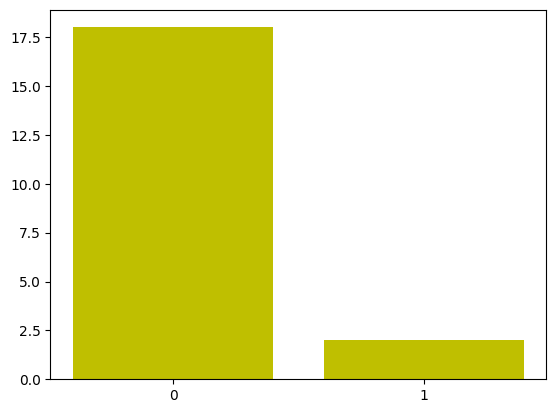

In [285]:
plt.bar(r.index,r,color='y')
plt.xticks(r.index)
plt.show()

In [286]:
random_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 854 to 903
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     20 non-null     int64  
 1   f_2     20 non-null     int64  
 2   f_3     20 non-null     float64
 3   f_4     20 non-null     float64
 4   f_5     20 non-null     int64  
 5   f_6     20 non-null     int64  
 6   f_7     20 non-null     float64
 7   f_8     20 non-null     float64
 8   f_9     20 non-null     float64
 9   f_10    20 non-null     float64
 10  f_11    20 non-null     float64
 11  f_12    20 non-null     float64
 12  f_13    20 non-null     float64
 13  f_14    20 non-null     float64
 14  f_15    20 non-null     float64
 15  f_16    20 non-null     float64
 16  f_17    20 non-null     float64
 17  f_18    20 non-null     float64
 18  f_19    20 non-null     float64
 19  f_20    20 non-null     float64
 20  f_21    20 non-null     float64
 21  f_22    20 non-null     float64
 22  f

In [287]:
random_df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,...,20.00000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.00000,20.000000,20.000000
mean,72.500000,352.000000,595.816000,781.086000,98.050000,8.822399e+05,47.489500,9.488000,5255.775000,0.217000,...,1099.60300,489.366500,275.457000,123.146000,3.416000,0.0,7864.763500,61.53450,8.022000,0.100000
std,72.667592,767.384965,617.320039,508.833309,60.518353,1.900990e+06,17.674527,3.223616,8824.397219,0.082277,...,1719.86485,681.114004,368.429282,170.534761,2.516168,0.0,7495.918589,10.80471,3.040796,0.307794
min,1.000000,10.000000,11.800000,233.750000,8.000000,8.100000e+04,24.490000,5.040000,704.000000,0.090000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,3271.520000,36.24000,6.010000,0.000000
25%,16.000000,17.000000,57.455000,484.777500,53.000000,1.277250e+05,31.060000,7.532500,1187.000000,0.175000,...,316.26250,180.000000,94.867500,27.555000,1.980000,0.0,4069.055000,65.71000,6.102500,0.000000
50%,44.500000,43.000000,237.760000,551.770000,90.000000,1.782000e+05,46.465000,8.365000,2101.000000,0.210000,...,484.66000,239.085000,172.500000,74.720000,3.215000,0.0,5450.350000,65.92000,6.940000,0.000000
75%,122.500000,185.250000,1075.367500,903.537500,150.500000,3.183982e+05,60.920000,11.657500,3831.000000,0.245000,...,957.35000,360.140000,193.755000,117.200000,4.660000,0.0,7242.170000,66.07000,7.725000,0.000000
max,261.000000,2971.000000,1765.530000,1833.660000,180.000000,7.427500e+06,75.600000,16.210000,37960.000000,0.400000,...,6211.68000,2405.200000,1245.070000,719.960000,10.880000,0.0,32053.950000,66.40000,14.970000,1.000000


In [288]:
rand_df = random_df.drop(columns=['f_1','f_33','f_37','f_46'],axis=1) # df is a cleaned DataFrame
rand_df

,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,...,f_40,f_41,f_42,f_43,f_44,f_45,f_47,f_48,f_49,target
854,14,141.86,446.50,66,113400,51.71,5.44,1064.0,0.10,106.6,...,50,484.66,180.00,126.00,49.30,3.85,3830.45,65.98,6.46,0
525,176,324.22,1542.32,110,247500,26.34,9.76,3149.5,0.37,78.6,...,86,0.00,0.00,0.00,0.00,0.00,8381.63,36.24,14.88,0
227,150,1238.74,473.91,35,375000,31.06,6.49,3600.0,0.21,104.2,...,39,1220.66,360.56,242.94,75.96,5.02,6594.33,65.72,7.66,0
203,2012,1280.20,733.65,68,5030000,30.87,7.57,37960.0,0.24,132.5,...,39,6211.68,1903.94,1122.68,317.17,5.53,6237.14,65.84,7.62,0
32,649,1765.53,1677.66,134,1622500,35.61,7.62,13520.0,0.21,120.0,...,55,2015.56,2405.20,956.04,719.96,2.11,5028.26,66.40,7.92,0
9,64,903.02,274.88,33,160000,41.22,7.90,1850.0,0.19,86.5,...,69,471.70,223.61,182.83,50.12,2.58,32053.95,65.58,7.35,1
134,62,1697.23,1330.31,28,155000,37.00,7.42,2180.0,0.20,71.1,...,55,670.82,335.41,117.61,100.69,5.70,4148.59,66.22,7.96,0
14,2971,1020.91,630.80,59,7427500,32.76,10.48,17380.0,0.32,427.4,...,55,5650.88,1749.29,1245.07,348.70,4.54,25579.34,65.78,7.41,1
282,53,1321.42,761.28,119,132500,31.06,6.07,2220.0,0.20,59.7,...,39,291.55,335.41,183.91,91.35,1.59,6862.35,65.86,7.65,0
732,10,11.80,490.00,180,81000,75.60,8.15,704.0,0.11,115.1,...,73,270.00,180.00,180.00,0.00,1.50,5217.91,65.98,6.01,0


### Selecting Independent(x) and Dependent(y) Features

In [292]:
x = rand_df.drop('target',axis=1) # Here carefull don't use inplace = True it effect actual df
y = rand_df['target']
print(type(x))  # Dataframe = Multi_Dimensional
print(type(y))  # Series = One Dimensional
print(x.shape)  
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(20, 44)
(20,)


In [293]:
from sklearn.preprocessing import StandardScaler

In [294]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-4.51899241e-01, -7.54469318e-01, -6.74637424e-01,
        -5.43349324e-01, -4.14948701e-01,  2.44993351e-01,
        -1.28835450e+00, -4.87361380e-01, -1.45897082e+00,
        -1.71220727e-01,  2.66865514e-01,  7.78407472e-02,
        -4.33541368e-01,  1.35904009e+00, -8.88455332e-01,
        -6.92749616e-01, -9.79002741e-01, -9.47437489e-01,
         6.46777205e-01,  4.53992345e-01, -8.70781477e-01,
         6.62825052e-01, -5.07052980e-01,  5.34937622e-01,
        -3.43258356e-01, -6.48881000e-01, -8.72492050e-01,
         5.81022192e-01,  7.55112034e-01, -1.06747698e+00,
        -1.06747698e+00, -5.22158190e-01, -5.13379601e-01,
        -5.16595512e-01, -4.98582957e-01, -7.85303989e-01,
        -3.66841735e-01, -4.66006175e-01, -4.16198315e-01,
        -4.44275391e-01,  1.76965406e-01, -5.52182934e-01,
         4.22129504e-01, -5.27025948e-01],
       [-2.35308480e-01, -4.51389229e-01,  1.53490267e+00,
         2.02590465e-01, -3.42573923e-01, -1.22769503e+00,
         8.65

In [295]:
print(type(x)) # Returns numpy Array
x.shape

<class 'numpy.ndarray'>


(20, 44)

#### Splitting The Data Into Training and Testing

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)  
print(y_train.shape)
print(y_test.shape)  

(15, 44)
(5, 44)
(15,)
(5,)


In [298]:
x_train,x_test

(array([[-4.54573201e-01, -8.33879093e-01, -1.10361267e+00,
         -4.75536616e-01, -4.23691963e-01,  6.97190532e-01,
         -2.88988608e-01, -4.97825330e-01, -9.60177380e-01,
         -2.63662246e-01, -7.16323222e-01, -6.59597911e-01,
         -8.52421916e-01,  3.46988959e-01, -9.78198295e-01,
         -5.32432878e-01, -8.51551924e-02, -8.64328937e-01,
         -5.11629729e-01, -6.21252683e-01, -8.70781477e-01,
          1.07894840e+00, -5.07052980e-01,  5.34937622e-01,
         -3.43258356e-01,  3.11225550e-01, -2.72821716e-01,
          8.66436601e-01,  1.03564901e+00, -1.05173248e+00,
         -1.05173248e+00, -5.22158190e-01, -5.13379601e-01,
         -5.20181284e-01, -4.98582957e-01, -7.85303989e-01,
         -3.66841735e-01, -4.66006175e-01, -5.16448817e-01,
         -3.58002484e-01,  8.04907168e-01, -4.60626785e-01,
          3.93642529e-01, -5.03407628e-01],
        [-3.87724201e-01,  1.83053659e+00,  1.10741951e+00,
         -1.18757005e+00, -3.92496868e-01, -6.08898888e-

### Applying The Saved Model on Random Data

In [299]:
randm_df = load_model.predict(x_test)
randm_df

array([0, 0, 0, 0, 0])